In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import feature_selection as f_select
import os.path
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
salary1_file=(r'C:\Users\abrah\Documents\Capstone project\finaldataset.csv')
pd.read_csv(salary1_file)
salary=pd.read_csv(salary1_file)
salary.drop(["Unnamed: 0"], axis = 1, inplace = True)


In [3]:
#Binary Categories
#0 - non star players
#1 - Star players
conditions = [(salary['Salary'] <= 18000000)]
choices = [0]
salary['Binary'] = np.select(conditions, choices, default=1)

print(salary.Binary.value_counts())
def confusion_matrix(model, x_test, y_test):
    model_confusion_test = metrics.confusion_matrix(y_test, model.predict(x_test))
    matrix = pd.DataFrame(data = model_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
                 index = ['Actual 0', 'Actual 1'])
    return matrix


0    362
1     49
Name: Binary, dtype: int64


In [4]:
x = salary[['WS', 'PTS/G', 'DRB/G', 'BPM']]
y = salary[['Binary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)


In [5]:
#SVM (Support Vector Machine)
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
classifier = SVC(gamma = 'auto')
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)
print(svm_model.score(x_train,y_train))


0.975609756097561


In [6]:
print(svm_model.score(x_val,y_val))

0.8902439024390244


In [7]:
#Model tuning to find the best parameters to fit the dataset
accuracy=[]
gamma=[0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5, 0.1]

for a in gamma:
    classifier = SVC(C=1,
        kernel='rbf',
        degree=2,
        gamma=a,
        coef0=1,
        shrinking=True,
        tol=0.5,
        probability=False,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))


In [8]:
print(accuracy)

[0.8536585365853658, 0.9024390243902439, 0.9146341463414634, 0.9390243902439024, 0.9390243902439024, 0.8902439024390244, 0.8780487804878049, 0.8536585365853658, 0.9390243902439024]


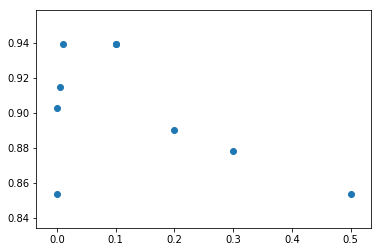

In [9]:
plt.scatter(gamma, accuracy)
plt.show()


In [10]:
# The greater the value of gamma, the lower the accuracy score
gamma=np.arange(0.0001, 0.005, 0.0003)
accuracy=[]

for a in gamma:
    classifier = SVC(C=1,
        kernel='rbf',
        degree=2,
        gamma=a,
        coef0=1,
        shrinking=True,
        tol=0.5,
        probability=False,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))

print(accuracy)


[0.8536585365853658, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9390243902439024, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9390243902439024, 0.9390243902439024, 0.9390243902439024, 0.9390243902439024]


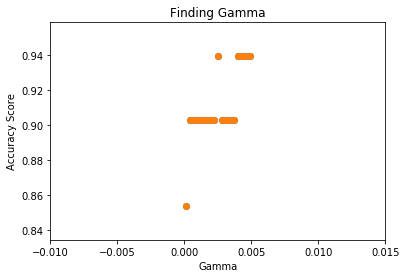

In [11]:
plt.scatter(gamma, accuracy)
plt.scatter(gamma, accuracy)
plt.title("Finding Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy Score")
plt.show()


In [12]:
accuracy=[]
C=np.arange(1,10,1)

for a in C:
    classifier = SVC(C=a,
        kernel='rbf',
        degree=2,	
        gamma=0.0013,
        coef0=1,
        shrinking=True,
        tol=0.5,
        probability=False,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))

print(accuracy)


[0.9024390243902439, 0.9146341463414634, 0.9390243902439024, 0.9146341463414634, 0.926829268292683, 0.9146341463414634, 0.926829268292683, 0.926829268292683, 0.926829268292683]


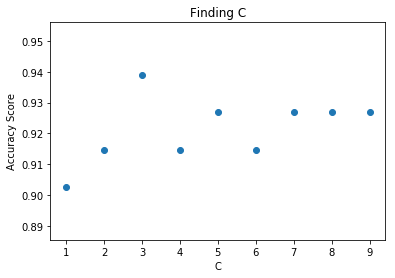

In [13]:
plt.scatter(C, accuracy)
plt.title("Finding C")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.show()


In [14]:
#It appears the highest accuracy score occurs when C=3
classifier = SVC(C=3, 
        kernel='rbf', 
        degree=2, 
        gamma=0.0013, 
        coef0=1, 
        shrinking=True, 
        tol=0.5, 
        probability=False, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)


In [15]:
print(svm_model.score(x_train,y_train))

0.943089430894309


In [16]:
print(svm_model.score(x_val,y_val))

0.9390243902439024


In [17]:
print(svm_model.score(x_test,y_test))

0.9397590361445783


In [18]:
confusion_matrix(svm_model, x_test, y_test)

,Predicted 0,Predicted 1
Actual 0,75,2
Actual 1,3,3


C:\Users\abrah\Anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


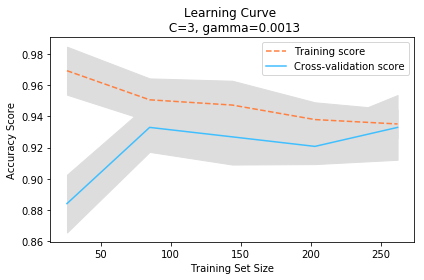

In [19]:
#Learning Curve
#Learning curves constitute a great tool to diagnose bias and variance in any supervised learning algorithm
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(classifier, n_jobs=1),
        x_model,
        y_model,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

plt.title("Learning Curve \n C=3, gamma=0.0013")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [20]:
#As seen from the figure, the greater the training set size, the lower the training score accuracy. While The cross validation score seems to be increasing as the training set size increases

In [21]:
#Nominal categories
#0 - Journeymen players
#1 - Role players
#2 - Average players
#3 - Star players
 
conditions1 = [(salary['Salary'] < 4000000), (salary['Salary'] <= 11000000), (salary['Salary'] <= 18000000)]
choices = [0, 1, 2]
salary['Nominal'] = np.select(conditions1, choices, default=3)


In [22]:
#NAÏVE BAYES
x = salary[['WS', 'PTS/G', 'DRB/G', 'BPM']]
y = salary[['Nominal']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)


In [23]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
nb_model = gaussian.fit(x_train, y_train.values.ravel())
print(nb_model.score(x_train,y_train))


0.6382113821138211


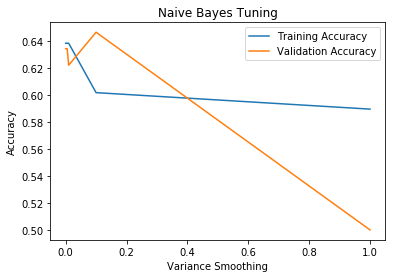

In [24]:
train_score = []
val_score = []
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]

for i in a:
    gaussian = GaussianNB(priors=None, var_smoothing=i)
    nb_model = gaussian.fit(x_train, y_train.values.ravel())
    train_score.append(nb_model.score(x_train, y_train))
    val_score.append(nb_model.score(x_val, y_val))

plt.plot(a,train_score)
plt.plot(a,val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Naive Bayes Tuning')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')
plt.show()


In [25]:
#The validation accuracy decreases at a higher rate than the training accuracy as the variance smoothing increases and goes lower than the training accuracy 

gaussian = GaussianNB(priors=None, var_smoothing=0.1)
nb_model = gaussian.fit(x_train, y_train.values.ravel())
print(nb_model.score(x_test, y_test))


0.5662650602409639


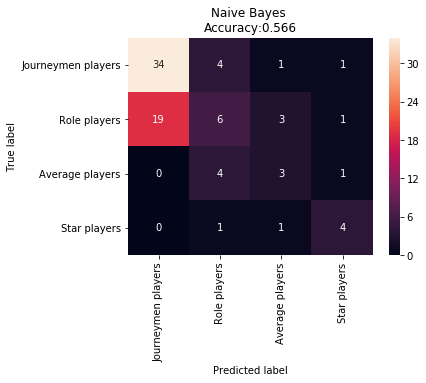

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
y_predict = nb_model.predict(x_test)
sl = confusion_matrix(y_test, y_predict)

sl_df = pd.DataFrame(sl,
       index = ['Journeymen players', 'Role players', 'Average players', 'Star players'],
       columns = ['Journeymen players', 'Role players', 'Average players', 'Star players'])

plt.figure(figsize=(5.5,4))
sns.heatmap(sl_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label') 
plt.xlabel('Predicted label')
plt.show()


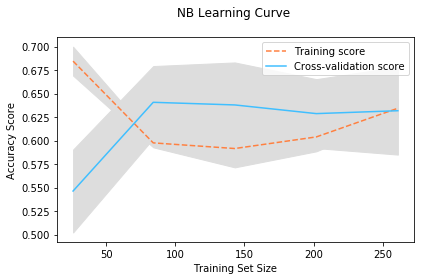

In [27]:
#Naive Bayes model has an accuracy of 0.566 as shown from the figure
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(GaussianNB(priors=None, var_smoothing=0.1)),
        x_model,
        y_model,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

plt.title("NB Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [28]:
#DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
print(decision_tree_model.score(x_train,y_train))


1.0


In [29]:
print(decision_tree_model.score(x_val,y_val))

0.6219512195121951


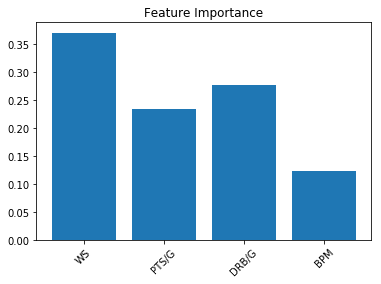

In [30]:
plt.bar(range(len(x_train.columns.values)), decision_tree_model.feature_importances_)
plt.xticks(range(len(x_train.columns.values)),x_train.columns.values, rotation= 45)
plt.title('Feature Importance')
plt.show()


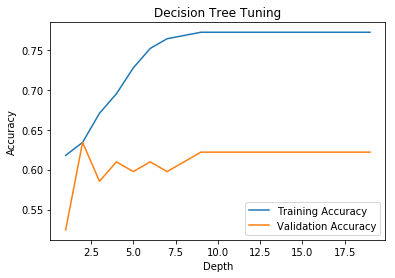

In [31]:
#From the bar chart, it can be seen that WS (Win Shares) is the most important feature followed by DRB/G (Defensive Rebounds per game), PTS/G (Points per game) and lastly, BPM (Box Plus/Minus) is the least important feature
train_score = []
val_score = []
for depth in np.arange(1,20):
    decision_tree = tree.DecisionTreeClassifier(max_depth = depth,min_samples_leaf = 5)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,20),train_score)
plt.plot(np.arange(1,20),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()



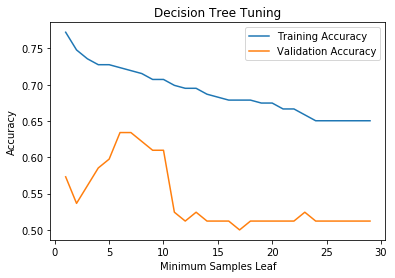

In [33]:
#The training accuracy is consistently higher than the validation accuracy

train_score = []
val_score = []
for leaf in np.arange(1,30):
    decision_tree = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = leaf)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,30),train_score)
plt.plot(np.arange(1,30),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')
plt.show()


In [34]:
#The training accuracy is consistently higher than the validation accuracy

my_decision_tree_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6)
my_decision_tree_model.fit(x_train, y_train)
print(my_decision_tree_model.score(x_train,y_train))


0.7235772357723578


In [35]:
print(my_decision_tree_model.score(x_val,y_val))

0.6341463414634146


In [36]:
print(my_decision_tree_model.score(x_test,y_test))

0.5301204819277109


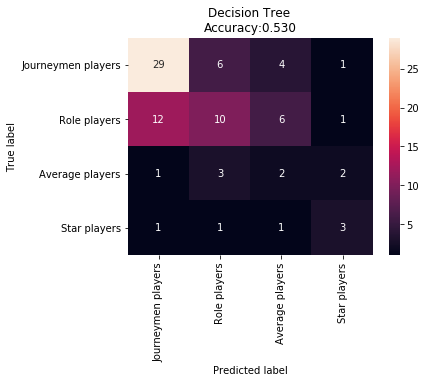

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
y_predict = my_decision_tree_model.predict(x_test)
sal = confusion_matrix(y_test, y_predict)
sal_df = pd.DataFrame(sal,
       index = ['Journeymen players', 'Role players', 'Average players', 'Star players'],
       columns = ['Journeymen players', 'Role players', 'Average players', 'Star players'])

y_predict = my_decision_tree_model.predict(x_test)
sal = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5.5,4))
sns.heatmap(sal_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [38]:
#Decision Tree model has an accuracy of 0.530 as shown from the figure

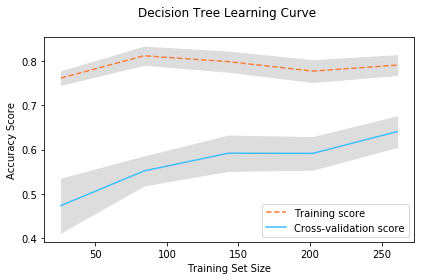

In [39]:
#Learning Curve
train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6)),
        x_model,
        y_model,
         cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")
plt.title("Decision Tree Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [40]:
#From the figure, it can be seen that the training score accuracy is consistently higher than the cross validation score as the training set size increases

In [41]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train.values.ravel())
print(logistic_model.score(x_train,y_train))


0.6422764227642277


In [42]:
print(logistic_model.score(x_val,y_val))

0.524390243902439


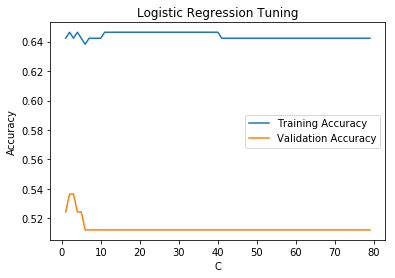

In [43]:
train_score = []
val_score=[]
for i in np.arange(1,80):
    logistic_model = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    logistic_model.fit(x_train,y_train.values.ravel())
    train_score.append(logistic_model.score(x_train, y_train))
    val_score.append(logistic_model.score(x_val,y_val))

plt.plot(np.arange(1,80),train_score)
plt.plot(np.arange(1,80),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Logistic Regression Tuning')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


In [44]:
#From the figure, it can be observed that the training accuracy and validation accuracy are relatively flat

my_logistic_regression_model = LogisticRegression(penalty = 'l2', C = 50, random_state = 0)
my_logistic_regression_model.fit(x_train, y_train)
print(my_logistic_regression_model.score(x_train,y_train))


0.6422764227642277


C:\Users\abrah\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print(my_logistic_regression_model.score(x_val,y_val))

0.5121951219512195


In [46]:
print(my_logistic_regression_model.score(x_test,y_test))

0.5301204819277109


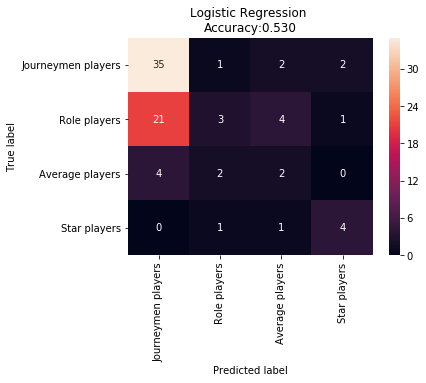

In [47]:
y_predict = my_logistic_regression_model.predict(x_test)
sal = confusion_matrix(y_test, y_predict)
sal_df = pd.DataFrame(sal,
       index = ['Journeymen players', 'Role players', 'Average players', 'Star players'],
       columns = ['Journeymen players', 'Role players', 'Average players', 'Star players'])

plt.figure(figsize=(5.5,4))
sns.heatmap(sal_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


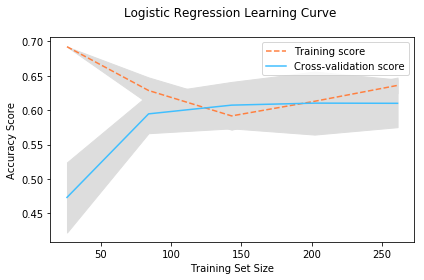

In [48]:
#Logistic Regression model has an accuracy of 0.530 as shown from the figure

from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(LogisticRegression(penalty = 'l2', C = 50, random_state = 0)),
        x_model,
        y_model,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

plt.title("Logistic Regression Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [49]:
#From the figure, it can be seen that the training score decreases before increasing as the training set size increases. While the cross validation score turns flat after initially increasing after the training set size increases